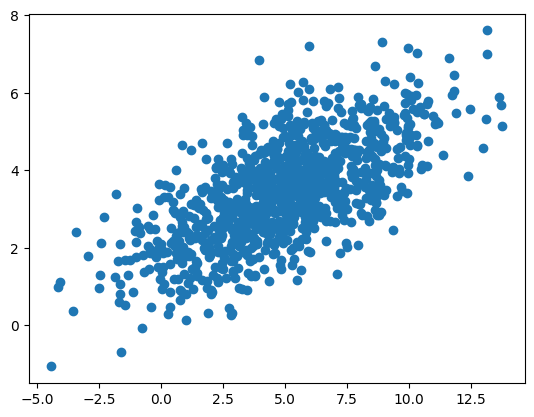

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
num_samples = 1000

x = np.random.normal(5, 3, num_samples)
y = 0.3*x + np.random.normal(2, 1, num_samples)

plt.scatter(x, y)
plt.show()


1. Eulcideian Distance 


      i. Distance

     ii. Threshold assumed 
     
    iii. detecting outliers: if eulcideian distance > threshold (then add into the outliers) 

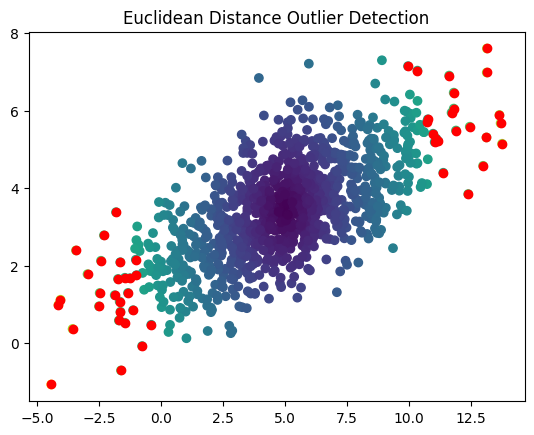

In [7]:
data = np.vstack((x, y)).T
mean_x = np.mean(x)
mean_y = np.mean(y)
euclideian_dist = np.sqrt((x-mean_x)**2 + (y - mean_y)**2)
threshold_euclidean = np.percentile(euclideian_dist, 95)
outliers_euclidean = data[euclideian_dist > threshold_euclidean]
plt.title('Euclidean Distance Outlier Detection')
plt.scatter(x, y, c=euclideian_dist)
plt.scatter(outliers_euclidean[:, 0], outliers_euclidean[:, 1], color='red')
plt.show()

2. Mahalanobis Distance 

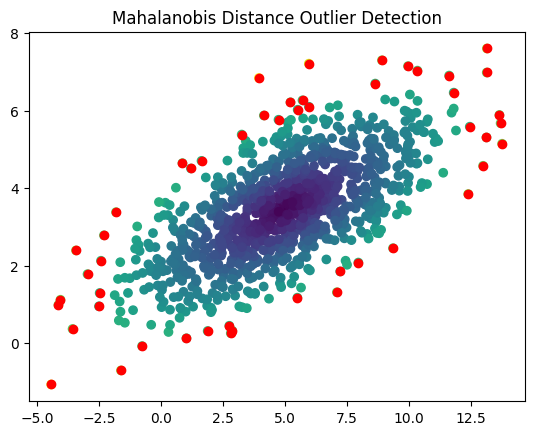

In [3]:
mean_vector = np.array([mean_x, mean_y])
S = np.cov(data, rowvar=False)
S_inverse =  np.linalg.inv(S)

mahal_dist = []
for i in data:
    diff = i - mean_vector
    distance = np.sqrt(diff.T @ S_inverse @ diff)
    mahal_dist.append(distance)
mahal_dist = np.array(mahal_dist)


threshold_mahalanobis = np.percentile(mahal_dist, 95)
outliers_mahalanobis = data[mahal_dist > threshold_mahalanobis]

plt.title('Mahalanobis Distance Outlier Detection')
plt.scatter(x, y, c=mahal_dist)
plt.scatter(outliers_mahalanobis[:, 0], outliers_mahalanobis[:, 1], color='red')

plt.show()

Comapre

[[11.6125707   6.9059857 ]
 [-4.43874452 -1.06114636]
 [12.98205827  4.57907121]
 [13.64040615  5.89044055]
 [13.13537434  7.60489161]
 [-3.57534381  0.37058001]
 [-1.82291113  3.38383011]
 [-4.14542807  0.99295535]
 [13.12995871  6.98535108]
 [-4.06225329  1.12461711]
 [11.79761829  6.46564678]
 [12.38211638  3.8508991 ]
 [-0.77159007 -0.0707725 ]
 [ 9.95451692  7.15006783]
 [-2.48132982  1.29849715]
 [13.68959853  5.6767828 ]
 [-3.43786116  2.39685237]
 [-2.97138701  1.78475111]
 [-2.50989882  0.95580305]
 [-2.30964148  2.7866099 ]
 [12.44489839  5.58734473]
 [-1.62403693 -0.6979714 ]
 [-2.42905304  2.13002563]
 [10.33426009  7.03368363]
 [13.74764964  5.14774348]
 [13.11948437  5.31036164]]


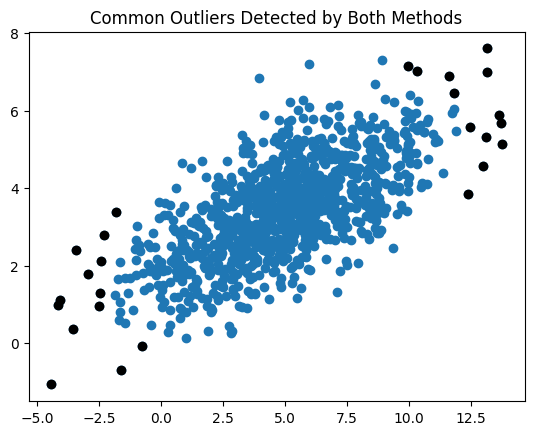

In [4]:
common_outliers = [];
for i in range(num_samples):
    if euclideian_dist[i] > threshold_euclidean and mahal_dist[i] > threshold_mahalanobis:
        common_outliers.append(data[i])

common_outliers = np.array(common_outliers) 
print(common_outliers)
plt.title('Common Outliers Detected by Both Methods')
plt.scatter(x, y)

if len(common_outliers) > 0:
    plt.scatter(common_outliers[:, 0], common_outliers[:, 1], color='black')
    
plt.show()

 Observations
1. Euclidean distance assumes circular spread around the mean. 
    It flags points that are simply far from the mean in plain space.

2. Mahalanobis distance accounts for correlation between X and Y. 
    Since Y depends on X in this dataset, the data is elongated 
    (elliptical). Mahalanobis correctly adapts to this ellipse.

3. Euclidean often marks points as outliers even if they lie along 
   the main correlation line, just far from the mean.

4. Mahalanobis focuses on points that deviate *off the main trend line*. 
    So, it usually finds fewer but more meaningful outliers.

 . Some points are common outliers under both methods, but many differ. 
    Mahalanobis is generally preferred when features are correlated.

PART 2

Making a fucntion fro Mahalonobis and not Eulcideian

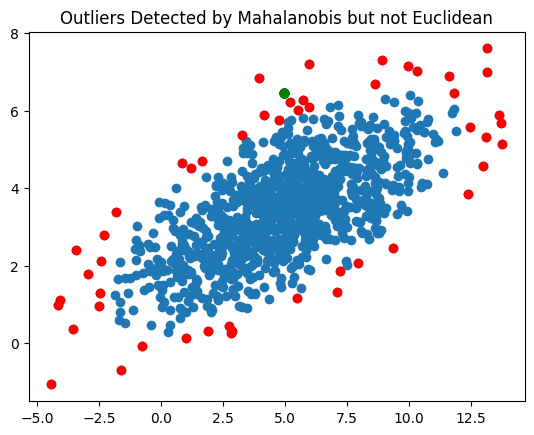

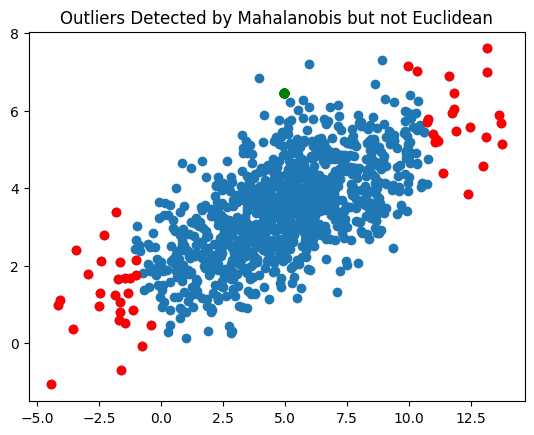

In [5]:
def mahal_only(data, num_points=10, x_mean_close=0, y_mean_close=10):
    mean_vector = np.mean(data, axis=0)

    new_points = []
    for _ in range(num_points):
        new_x = mean_vector[0] + x_mean_close
        new_y = mean_vector[1] + y_mean_close
        new_points.append([new_x, new_y])

    return np.array(new_points)

new_outliers = mahal_only(data, num_points=20, x_mean_close=0, y_mean_close=3)
new_data = np.vstack((data, new_outliers))


plt.scatter(new_data[:,0], new_data[:,1] )
plt.scatter(outliers_mahalanobis[:, 0], outliers_mahalanobis[:, 1], color='red')
if len(new_outliers) > 0:
    plt.scatter(new_outliers[:,0], new_outliers[:,1], color='green')
plt.title("Outliers Detected by Mahalanobis but not Euclidean")
plt.show()


plt.scatter(new_data[:,0], new_data[:,1] )
plt.scatter(outliers_euclidean[:, 0], outliers_euclidean[:, 1], color='red')
if len(new_outliers) > 0:
    plt.scatter(new_outliers[:,0], new_outliers[:,1], color='green')
plt.title("Outliers Detected by Mahalanobis but not Euclidean")
plt.show()
